In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from tp3.tsp import EuclideanTravelingSalesProblemGenerator, TspAutomapper

In [2]:
from tp3.kohonen import CircularDataGenerator, KohonenNetwork, SquareDataGenerator, TriangleDataGenerator
import tp3.tp3 as auxTp

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 10.0)

## Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

In [4]:
# N = 50
# sg = SquareDataGenerator()
# target = sg.generate(N)
# _ = plt.scatter(target[:, 0], target[:, 1], c="orange")
#
# plt.figure()
# ta = KohonenNetwork([2,25])
# ta.set_target(target)
# xx = ta.weights_map[:, 0]
# yy = ta.weights_map[:, 1]
# _ = plt.scatter(xx,yy, c="blue")
# _ = plt.fill(xx, yy, fill=False, c="blue")
#
# ta.train(100)
#
# plt.figure()
# xx = ta.weights_map[:, 0]
# yy = ta.weights_map[:, 1]
# _ = plt.scatter(target[:, 0], target[:, 1], c="orange")
# _ = plt.scatter(xx,yy, c="blue")
# _ = plt.fill(xx, yy, fill=False, c="blue")

### Distribución circular

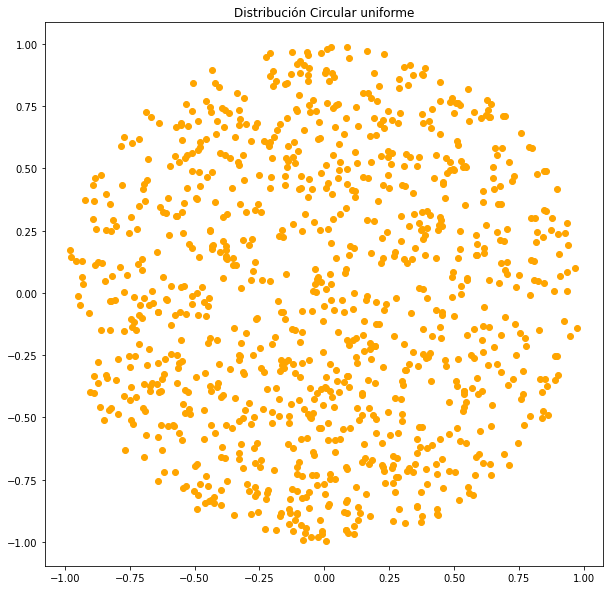

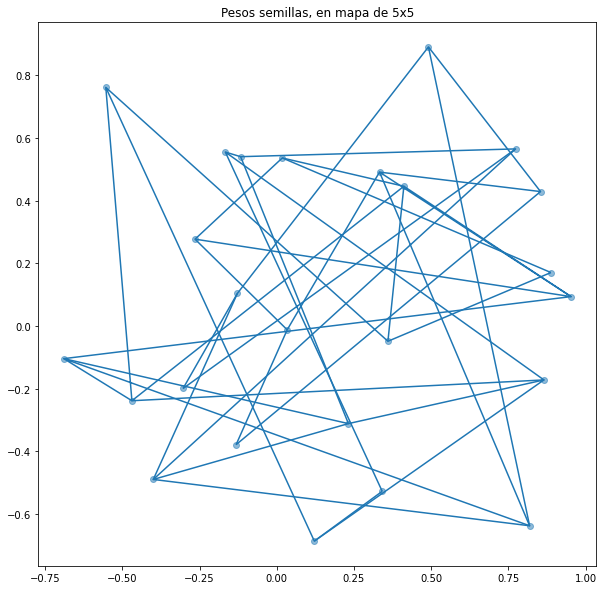

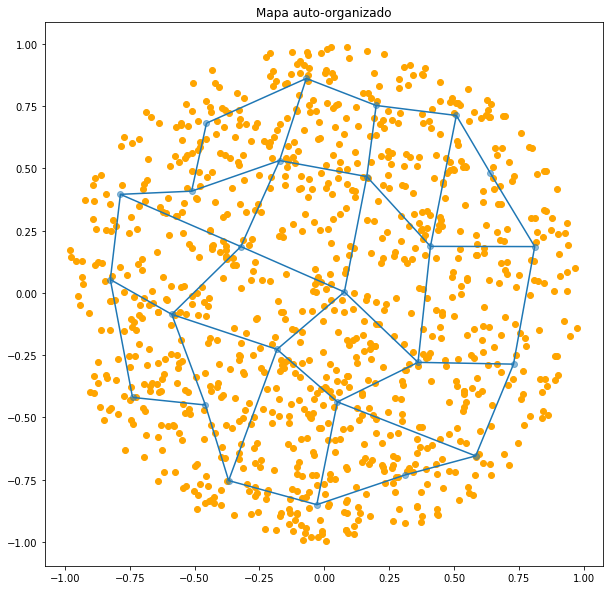

In [5]:
auxTp.plot_map_for_distribution(CircularDataGenerator())

### Distribución Cuadrada

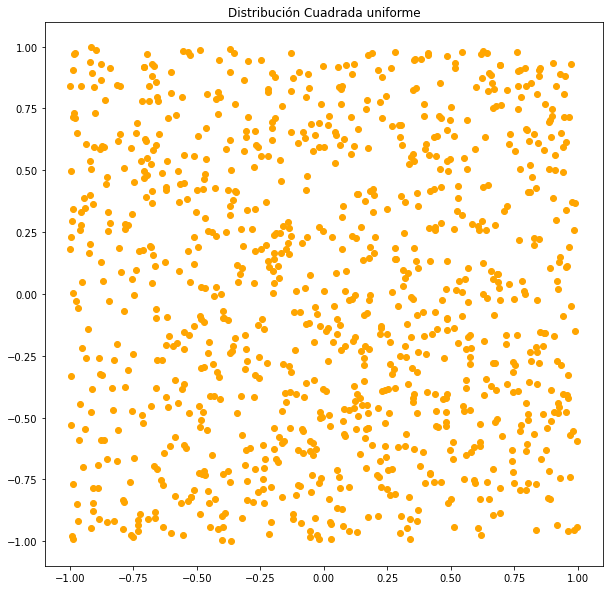

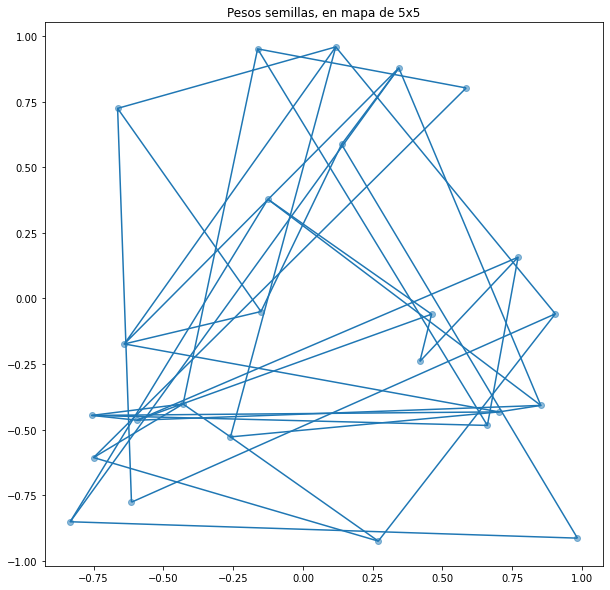

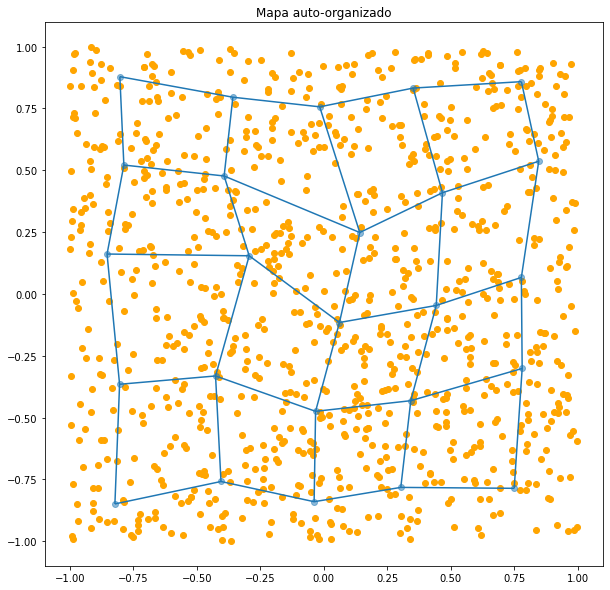

In [6]:
auxTp.plot_map_for_distribution(SquareDataGenerator())

### Distribución Triangular

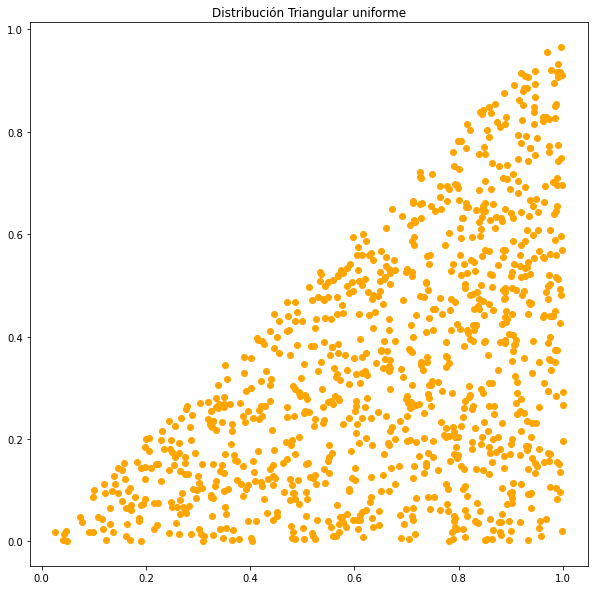

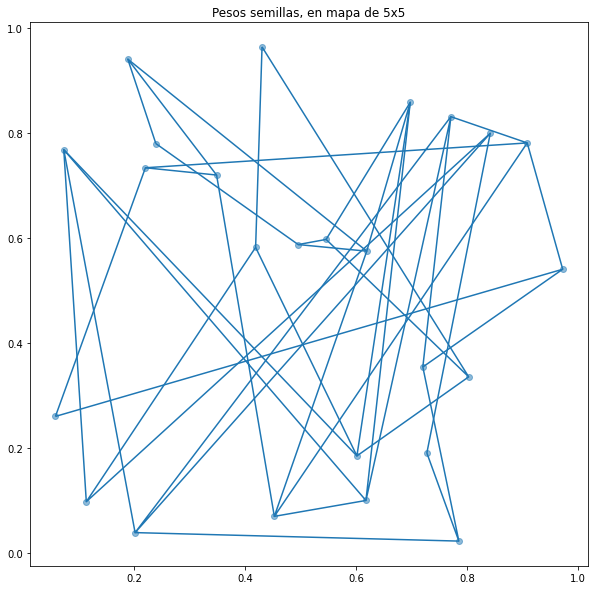

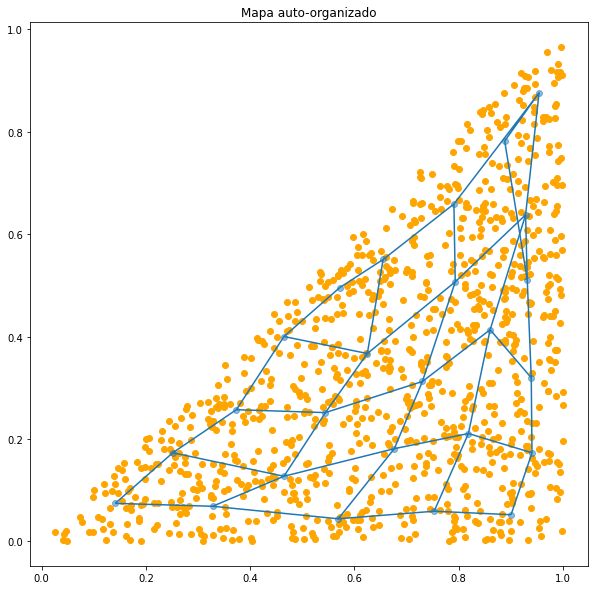

In [11]:
auxTp.plot_map_for_distribution(TriangleDataGenerator())

### Resuelva (aproximadamente) el “Traveling salesman problem” para 200 ciudades con una red de Kohonen.

El problema resulta en una reducción de dimensionalidad de 2d a 1d.

Se modifica el cálculo de la distancia utilizada por el algoritmo para usar diferencia de ángulos, y de esta forma obligar a que el viajante de comercio regrese a la ciudad de origen.

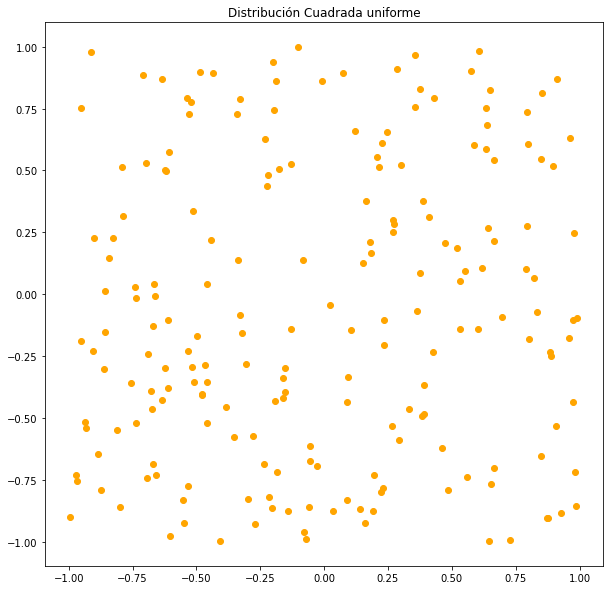

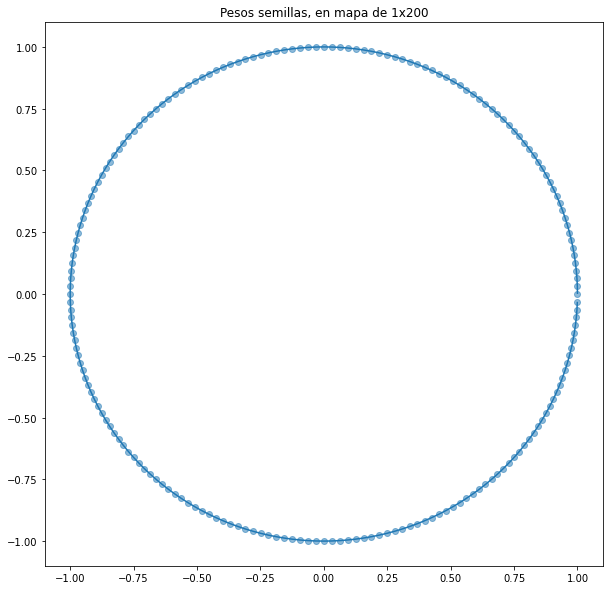

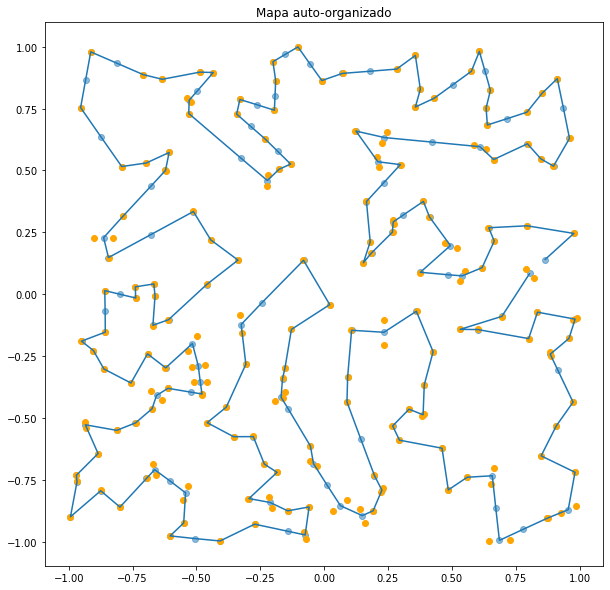

In [4]:
auxTp.plot_map_for_tsp(200)

## Clustering

In [10]:
data = np.genfromtxt("data/datos_para_clustering.csv",delimiter=",").shape

In [11]:
ta = KohonenNetwork([25,5])

In [12]:
ta.set_target(data)

IndexError: tuple index out of range